In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('customer_churn_data.csv')
print(df.shape)
df.head()

(1000, 10)


,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [99]:
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [100]:
df["InternetService"] = df["InternetService"].fillna("")


In [101]:
df.duplicated().sum()

np.int64(0)

In [102]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [103]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_data = df[numerical_cols]
numerical_cols_data.head()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
0,1,49,4,88.35,353.40
1,2,43,0,36.67,0.00
2,3,51,2,63.79,127.58
3,4,60,8,102.34,818.72
4,5,42,32,69.01,2208.32


In [104]:
numerical_cols_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


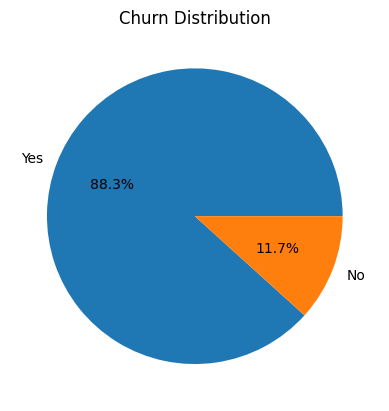

In [105]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.ylabel('')
plt.show()

In [106]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [107]:
df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [108]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [109]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

In [110]:
df.groupby('Churn')['ContractType'].value_counts()

Churn  ContractType  
No     One-Year           71
       Two-Year           46
Yes    Month-to-Month    511
       One-Year          218
       Two-Year          154
Name: count, dtype: int64

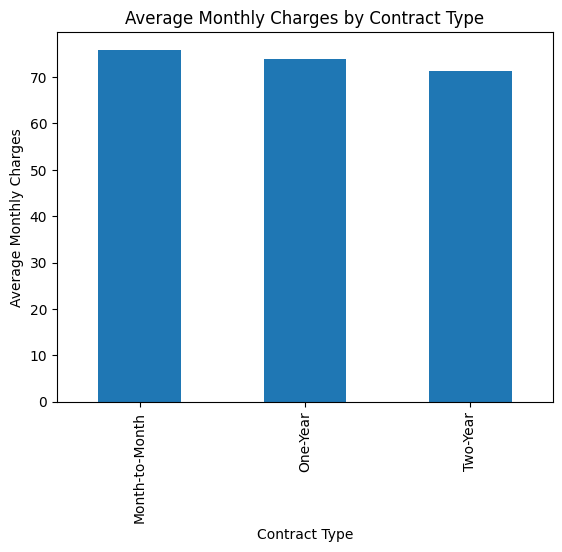

In [111]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.title('Average Monthly Charges by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Average Monthly Charges')
plt.show()

In [112]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [113]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]
Y = df[['Churn']]
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
Y['Churn'] = Y['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

log_model = LogisticRegression()
log_model.fit(X_train, Y_train)

Y_pred = log_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')


Logistic Regression Accuracy: 0.88


In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
knn_model = grid_search.best_estimator_
knn_model.fit(X_train, Y_train)
print(f'Best KNN Parameters: {grid_search.best_params_}')
Y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

Best KNN Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
KNN Accuracy: 0.89


In [118]:
from sklearn.svm import SVC
param_grid_svc = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf', 'poly']}
grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=5)
grid_search_svc.fit(X_train, Y_train)
svc_model = grid_search_svc.best_estimator_
svc_model.fit(X_train, Y_train)
print(f'Best SVC Parameters: {grid_search_svc.best_params_}')
Y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
print(f'SVC Accuracy: {accuracy_svc:.2f}')

Best SVC Parameters: {'C': 10, 'kernel': 'rbf'}
SVC Accuracy: 0.88


In [119]:
from sklearn.tree import DecisionTreeClassifier
param_grid_dt = {'max_depth': [None, 10, 20, 30],
                 'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, Y_train)
print(f'Best Decision Tree Parameters: {grid_search_dt.best_params_}')
dt_model = grid_search_dt.best_estimator_
dt_model.fit(X_train, Y_train)
Y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree Accuracy: 0.83


In [120]:
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'n_estimators': [32, 64, 128, 256],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, Y_train)
print(f'Best Random Forest Parameters: {grid_search_rf.best_params_}')
rf_model = grid_search_rf.best_estimator_
Y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Best Random Forest Parameters: {'bootstrap': True, 'max_features': 2, 'n_estimators': 256}
Random Forest Accuracy: 0.88


In [121]:
import pickle
with open('knn_churn_model.pkl', 'wb') as f:
    pickle.dump(knn_model, f)

In [124]:
new_customer = {'Age': 45, 'Gender': 1, 'Tenure': 12, 'MonthlyCharges': 70.5}
new_customer_df = pd.DataFrame([new_customer])
new_customer_scaled = scaler.transform(new_customer_df)
churn_prediction = knn_model.predict(new_customer_scaled)
print(f'Churn Prediction for New Customer: {"Yes" if churn_prediction[0] == 1 else "No"}')

Churn Prediction for New Customer: Yes
